In [ ]:
import numpy as np

import numpy as np는 파이썬에서 numpy 
라이브러리를 np라는 이름으로 불러오는 코드입니다. numpy는 수치 계산을 위한 파이썬 라이브러리로, 배열, 행렬, 수학적 함수 등을 지원합니다. np는 numpy 라이브러리를 간편하게 사용할 수 있도록 줄여서 사용하기 위한 약칭입니다.

In [ ]:
class Mnist_model:
    def __init__(self, X_train, Y_train,lr=0.1 ,epoch=1000):
        self.lr = lr
        self.epoch = epoch
        self.X_train = X_train
        self.Y_train = Y_train
        self.input_size = 784  # 입력층 노드 수
        self.hidden_layer1_size = 50  # 첫 번째 은닉층 노드 수
        self.hidden_layer2_size = 100  # 두 번째 은닉층 노드 수
        self.output_size = 10  # 출력층 노드 수
        self.w1 = np.random.randn(self.input_size, self.hidden_layer1_size) * np.sqrt(2. / self.input_size)
        self.w2 = np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size) * np.sqrt(2. / self.hidden_layer1_size)
        self.w3 = np.random.randn(self.hidden_layer2_size, self.output_size) * np.sqrt(2. / self.hidden_layer2_size)
        self.b1 = np.zeros((1, self.hidden_layer1_size))
        self.b2 = np.zeros((1, self.hidden_layer2_size))
        self.b3 = np.zeros((1, self.output_size))

    def relu(self,x):
        return np.maximum(0, x)

    def relu_derivative(self,x):
        return (x > 0).astype(float)

    def softmax(self,x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self,y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))
    
    def Laerning(self):
        for ep in range(self.epoch):
            # 순전파
            z1 = np.dot(self.X_train, self.w1) + self.b1
            a1 = self.relu(z1)  # ReLU 함수 사용
            z2 = np.dot(a1, self.w2) + self.b2
            a2 = self.relu(z2)  # ReLU 함수 사용
            z3 = np.dot(a2, self.w3) + self.b3
            a3 = self.softmax(z3)
            # 손실 계산
            loss = self.cross_entropy_loss(self.Y_train, a3)
            # 역전파
            dL_da3 = a3 - self.Y_train
            dL_dw3 = np.dot(a2.T, dL_da3) / self.X_train.shape[0]
            dL_db3 = np.sum(dL_da3, axis=0, keepdims=True) / self.X_train.shape[0]

            dL_da2 = np.dot(dL_da3, self.w3.T) * self.relu_derivative(a2)  # ReLU 미분 사용
            dL_dw2 = np.dot(a1.T, dL_da2) / self.X_train.shape[0]
            dL_db2 = np.sum(dL_da2, axis=0, keepdims=True) / self.X_train.shape[0]

            dL_da1 = np.dot(dL_da2, self.w2.T) * self.relu_derivative(a1)  # ReLU 미분 사용
            dL_dw1 = np.dot(self.X_train.T, dL_da1) / self.X_train.shape[0]
            dL_db1 = np.sum(dL_da1, axis=0, keepdims=True) / self.X_train.shape[0]


            # 가중치 및 바이어스 업데이트
            self.w3 -= self.lr * dL_dw3
            self.b3 -= self.lr * dL_db3
            self.w2 -= self.lr * dL_dw2
            self.b2 -= self.lr * dL_db2
            self.w1 -= self.lr * dL_dw1
            self.b1 -= self.lr * dL_db1

            # 에폭마다 손실 출력
            #if epoch % 100 == 0:
            print(f"Epoch {ep}, Loss: {loss:.4f}")
            
    # 모델 평가
    def evaluate(self,X_test, y_test):
        z1 = np.dot(X_test, self.w1) + self.b1
        a1 = self.relu(z1)
        z2 = np.dot(a1, self.w2) + self.b2
        a2 = self.relu(z2)
        z3 = np.dot(a2, self.w3) + self.b3
        a3 = self.relu(z3)

        predictions = np.argmax(a3, axis=1)
        accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
        return accuracy
    
    

이 코드는 간단한 인공 신경망 모델을 정의하는 Mnist_model 클래스를 구현한 것입니다. 이 신경망은 MNIST 데이터셋(손글씨 숫자 이미지 데이터셋)을 학습하고 예측하는 데 사용됩니다. 각 메서드와 부분에 대해 한 줄씩 해석하겠습니다.

클래스 초기화 (__init__)
python
코드 복사
def __init__(self, X_train, Y_train, lr=0.1, epoch=1000):
클래스의 생성자 메서드입니다. 모델을 초기화하고 학습에 필요한 하이퍼파라미터와 데이터를 설정합니다.
python
코드 복사
self.lr = lr
학습률(lr)을 설정합니다. 학습률은 가중치 업데이트의 크기를 조절하는 파라미터입니다.
python
코드 복사
self.epoch = epoch
학습을 반복할 에폭 수를 설정합니다.
python
코드 복사
self.X_train = X_train
self.Y_train = Y_train
학습 데이터(X_train)와 레이블(Y_train)을 저장합니다.
python
코드 복사
self.input_size = 784  # 입력층 노드 수
self.hidden_layer1_size = 50  # 첫 번째 은닉층 노드 수
self.hidden_layer2_size = 100  # 두 번째 은닉층 노드 수
self.output_size = 10  # 출력층 노드 수
네트워크의 각 레이어의 노드 수를 정의합니다. MNIST 데이터셋은 28x28 픽셀 이미지이므로 입력층 노드 수는 784입니다.
python
코드 복사
self.w1 = np.random.randn(self.input_size, self.hidden_layer1_size) * np.sqrt(2. / self.input_size)
self.w2 = np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size) * np.sqrt(2. / self.hidden_layer1_size)
self.w3 = np.random.randn(self.hidden_layer2_size, self.output_size) * np.sqrt(2. / self.hidden_layer2_size)
각 레이어의 가중치(w1, w2, w3)를 초기화합니다. 가중치는 정규분포에서 샘플링되어, He 초기화 기법을 사용하여 초기화됩니다.
python
코드 복사
self.b1 = np.zeros((1, self.hidden_layer1_size))
self.b2 = np.zeros((1, self.hidden_layer2_size))
self.b3 = np.zeros((1, self.output_size))
각 레이어의 바이어스(b1, b2, b3)를 0으로 초기화합니다.
ReLU 활성화 함수
python
코드 복사
def relu(self, x):
    return np.maximum(0, x)
ReLU (Rectified Linear Unit) 함수입니다. 입력값이 0보다 크면 그대로 반환하고, 그렇지 않으면 0을 반환합니다.
ReLU 미분
python
코드 복사
def relu_derivative(self, x):
    return (x > 0).astype(float)
ReLU 함수의 미분입니다. 입력값이 0보다 크면 1, 그렇지 않으면 0을 반환합니다.
Softmax 함수
python
코드 복사
def softmax(self, x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
Softmax 함수입니다. 각 클래스의 확률을 계산하여, 전체 확률의 합이 1이 되도록 합니다.
교차 엔트로피 손실 함수
python
코드 복사
def cross_entropy_loss(self, y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))
교차 엔트로피 손실 함수입니다. 실제 레이블(y_true)과 예측값(y_pred) 간의 차이를 측정합니다. 1e-9는 로그 계산 시 0으로 인한 오류를 방지하기 위한 작은 수입니다.
학습 함수
python
코드 복사
def Laerning(self):
    for ep in range(self.epoch):
        # 순전파
        z1 = np.dot(self.X_train, self.w1) + self.b1
        a1 = self.relu(z1)  # ReLU 함수 사용
        z2 = np.dot(a1, self.w2) + self.b2
        a2 = self.relu(z2)  # ReLU 함수 사용
        z3 = np.dot(a2, self.w3) + self.b3
        a3 = self.softmax(z3)
        # 손실 계산
        loss = self.cross_entropy_loss(self.Y_train, a3)
        # 역전파
        dL_da3 = a3 - self.Y_train
        dL_dw3 = np.dot(a2.T, dL_da3) / self.X_train.shape[0]
        dL_db3 = np.sum(dL_da3, axis=0, keepdims=True) / self.X_train.shape[0]

        dL_da2 = np.dot(dL_da3, self.w3.T) * self.relu_derivative(a2)  # ReLU 미분 사용
        dL_dw2 = np.dot(a1.T, dL_da2) / self.X_train.shape[0]
        dL_db2 = np.sum(dL_da2, axis=0, keepdims=True) / self.X_train.shape[0]

        dL_da1 = np.dot(dL_da2, self.w2.T) * self.relu_derivative(a1)  # ReLU 미분 사용
        dL_dw1 = np.dot(self.X_train.T, dL_da1) / self.X_train.shape[0]
        dL_db1 = np.sum(dL_da1, axis=0, keepdims=True) / self.X_train.shape[0]
순전파: 입력 데이터(X_train)를 네트워크를 통해 전달하여 예측값(a3)을 계산합니다.
손실 계산: 예측값과 실제 레이블을 비교하여 손실을 계산합니다.
역전파: 손실을 네트워크의 각 파라미터(가중치와 바이어스)에 대해 미분하여, 손실을 줄이기 위한 방향으로 파라미터를 업데이트할 수 있도록 합니다.
가중치 및 바이어스 업데이트: 계산된 기울기를 사용하여 가중치와 바이어스를 업데이트합니다.
python
코드 복사
self.w3 -= self.lr * dL_dw3
self.b3 -= self.lr * dL_db3
self.w2 -= self.lr * dL_dw2
self.b2 -= self.lr * dL_db2
self.w1 -= self.lr * dL_dw1
self.b1 -= self.lr * dL_db1
파라미터 업데이트: 학습률(lr)을 곱한 기울기를 현재 파라미터에서 빼서 가중치와 바이어스를 업데이트합니다.
python
코드 복사
print(f"Epoch {ep}, Loss: {loss:.4f}")
손실 출력: 매 에폭마다 손실 값을 출력하여 학습 진행 상황을 모니터링합니다.
모델 평가
python
코드 복사
def evaluate(self, X_test, y_test):
    z1 = np.dot(X_test, self.w1) + self.b1
    a1 = self.relu(z1)
    z2 = np.dot(a1, self.w2) + self.b2
    a2 = self.relu(z2)
    z3 = np.dot(a2, self.w3) + self.b3
    a3 = self.relu(z3)

    predictions = np.argmax(a3, axis=1)
    accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
    return accuracy
순전파: 테스트 데이터(X_test)를 네트워크를 통해 전달하여 예측값을 계산합니다.
정확도 계산: 예측값과 실제 레이블을 비교하여 정확도를 계산합니다. np.argmax를 사용하여 가장 높은 확률을 가진 클래스를 선택합니다.
정확도 반환: 모델의 성능을 평가할 때 사용하는 정확도를 반환합니다.
이렇게 Mnist_model 클래스는 간단한 신경망을 정의하고, 학습 및 평가를 수행하는 기능을 가지고 있습니다.

In [ ]:

# idx 형식 파일 읽기 함수
def load_idx_file(filename):
    with open(filename, 'rb') as f:
        # 파일 헤더 부분 읽기
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        if magic_number == 2051:  # 이미지 파일
            num_images = int.from_bytes(f.read(4), byteorder='big')
            rows = int.from_bytes(f.read(4), byteorder='big')
            cols = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
        elif magic_number == 2049:  # 레이블 파일
            num_labels = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError(f"Wrong File: {filename}")
    return data



In [ ]:
# 원-핫 인코딩 함수
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [ ]:
# 데이터 로드
X_train = load_idx_file('train-images.idx3-ubyte')
y_train = load_idx_file('train-labels.idx1-ubyte')
X_test = load_idx_file('t10k-images.idx3-ubyte')
y_test = load_idx_file('t10k-labels.idx1-ubyte')

In [ ]:
# 데이터 전처리
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train_encoded = one_hot_encode(y_train, 10)
y_test_encoded = one_hot_encode(y_test, 10)


In [ ]:
Mnist = Mnist_model(X_train,y_train_encoded,0.1,1000)
Mnist.Laerning()

In [ ]:
train_accuracy = Mnist.evaluate(X_train,y_train_encoded)
test_accuracy = Mnist.evaluate(X_test,y_test_encoded)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

회귀 형식으로 변경

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
# idx 형식 파일 읽기 함수
def load_idx_file(filename):
    with open(filename, 'rb') as f:
        # 파일 헤더 부분 읽기
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        if magic_number == 2051:  # 이미지 파일
            num_images = int.from_bytes(f.read(4), byteorder='big')
            rows = int.from_bytes(f.read(4), byteorder='big')
            cols = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows * cols)
        elif magic_number == 2049:  # 레이블 파일
            num_labels = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError(f"Wrong File: {filename}")
    return data

# 데이터 로드
X_train = load_idx_file('train-images.idx3-ubyte')
y_train = load_idx_file('train-labels.idx1-ubyte')
X_test = load_idx_file('t10k-images.idx3-ubyte')
y_test = load_idx_file('t10k-labels.idx1-ubyte')
# 데이터 전처리
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
class Mnist_model:
    def __init__(self, X_train, Y_train,lr=0.01 ,epoch=1000):
        self.lr = lr
        self.epoch = epoch
        self.X_train = X_train
        self.Y_train = Y_train
        self.input_size = 784  # 입력층 노드 수
        self.hidden_layer1_size = 128  # 첫 번째 은닉층 노드 수
        self.hidden_layer2_size = 64  # 두 번째 은닉층 노드 수
        self.output_size = 1  # 출력층 노드 수
        self.w1 = np.random.randn(self.input_size, self.hidden_layer1_size) * np.sqrt(2. / self.input_size)
        self.w2 = np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size) * np.sqrt(2. / self.hidden_layer1_size)
        self.w3 = np.random.randn(self.hidden_layer2_size, self.output_size) * np.sqrt(2. / self.hidden_layer2_size)
        self.b1 = np.zeros((1, self.hidden_layer1_size))
        self.b2 = np.zeros((1, self.hidden_layer2_size))
        self.b3 = np.zeros((1, self.output_size))

    def relu(self,x):
        return np.maximum(0, x)

    def relu_derivative(self,x):
        return (x > 0).astype(float)

    def mse_loss(self,y_true, y_pred):
        return np.mean((y_true -y_pred)**2)
    
    def Laerning(self):
        for ep in range(self.epoch):
            # 순전파
            z1 = np.dot(self.X_train, self.w1) + self.b1
            a1 = self.relu(z1)  # ReLU 함수 사용
            z2 = np.dot(a1, self.w2) + self.b2
            a2 = self.relu(z2)  # ReLU 함수 사용
            z3 = np.dot(a2, self.w3) + self.b3
            a3 = z3
            # 손실 계산
            loss = self.mse_loss(self.Y_train.reshape(-1, 1), a3)
            # 역전파
            dL_da3 = 2 * (a3 - self.Y_train.reshape(-1, 1))/ self.X_train.shape[0]
            dL_dw3 = np.dot(a2.T, dL_da3)
            dL_db3 = np.sum(dL_da3, axis=0, keepdims=True)

            dL_da2 = np.dot(dL_da3, self.w3.T) * self.relu_derivative(a2)  # ReLU 미분 사용
            dL_da2 = np.clip(dL_da2, -5, 5)  
            dL_dw2 = np.dot(a1.T, dL_da2) 
            dL_db2 = np.sum(dL_da2, axis=0, keepdims=True) 

            dL_da1 = np.dot(dL_da2, self.w2.T) * self.relu_derivative(a1)  # ReLU 미분 사용
            dL_da1 = np.clip(dL_da1, -5, 5)  
            dL_dw1 = np.dot(self.X_train.T, dL_da1) 
            dL_db1 = np.sum(dL_da1, axis=0, keepdims=True) 

            # 가중치 및 바이어스 업데이트
            self.w3 -= self.lr * dL_dw3
            self.b3 -= self.lr * dL_db3
            self.w2 -= self.lr * dL_dw2
            self.b2 -= self.lr * dL_db2
            self.w1 -= self.lr * dL_dw1
            self.b1 -= self.lr * dL_db1

            # 에폭마다 손실 출력
            #if epoch % 100 == 0:
            print(f"Epoch {ep}, Loss: {loss:.4f}")
            
    # 모델 평가
    def evaluate(self,X_test, y_test):
        z1 = np.dot(X_test, self.w1) + self.b1
        a1 = self.relu(z1)
        z2 = np.dot(a1, self.w2) + self.b2
        a2 = self.relu(z2)
        z3 = np.dot(a2, self.w3) + self.b3
        a3 = z3
        # 예측된 값은 숫자이므로 반올림하여 가장 가까운 정수로 변환
        predictions = np.round(a3).astype(int).flatten()
        accuracy = np.mean(predictions == y_test)
        return accuracy,predictions

    def show_predictions(self, X_test, y_test, num_examples=5):
        accuracy, predictions = self.evaluate(X_test, y_test)
        for i in range(num_examples):
            plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
            plt.title(f'Actual: {y_test[i]}, Predicted: {predictions[i]}')
            plt.show()
    
    

In [10]:
Mnist = Mnist_model(X_train,y_train,0.01,1000)
Mnist.Laerning()

Epoch 0, Loss: 30.4723
Epoch 1, Loss: 11.1697
Epoch 2, Loss: 9.1284
Epoch 3, Loss: 8.3434
Epoch 4, Loss: 7.4702
Epoch 5, Loss: 6.9955
Epoch 6, Loss: 6.4818
Epoch 7, Loss: 6.3242
Epoch 8, Loss: 6.0077
Epoch 9, Loss: 6.2116
Epoch 10, Loss: 5.9053
Epoch 11, Loss: 6.5079
Epoch 12, Loss: 5.8883
Epoch 13, Loss: 6.6886
Epoch 14, Loss: 5.7039
Epoch 15, Loss: 6.3842
Epoch 16, Loss: 5.4538
Epoch 17, Loss: 5.9744
Epoch 18, Loss: 5.2320
Epoch 19, Loss: 5.6374
Epoch 20, Loss: 5.0466
Epoch 21, Loss: 5.3738
Epoch 22, Loss: 4.8904
Epoch 23, Loss: 5.1603
Epoch 24, Loss: 4.7560
Epoch 25, Loss: 4.9845
Epoch 26, Loss: 4.6392
Epoch 27, Loss: 4.8371
Epoch 28, Loss: 4.5359
Epoch 29, Loss: 4.7108
Epoch 30, Loss: 4.4439
Epoch 31, Loss: 4.6013
Epoch 32, Loss: 4.3609
Epoch 33, Loss: 4.5052
Epoch 34, Loss: 4.2857
Epoch 35, Loss: 4.4201
Epoch 36, Loss: 4.2168
Epoch 37, Loss: 4.3432
Epoch 38, Loss: 4.1526
Epoch 39, Loss: 4.2731
Epoch 40, Loss: 4.0932
Epoch 41, Loss: 4.2093
Epoch 42, Loss: 4.0378
Epoch 43, Loss: 4.1

In [11]:
train_accuracy,pred1 = Mnist.evaluate(X_train,y_train)
test_accuracy,pred2 = Mnist.evaluate(X_test,y_test)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.5629, Test Accuracy: 0.5592


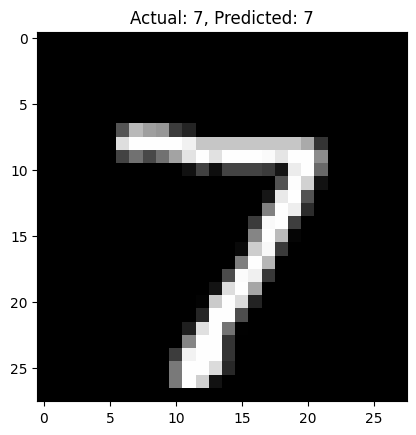

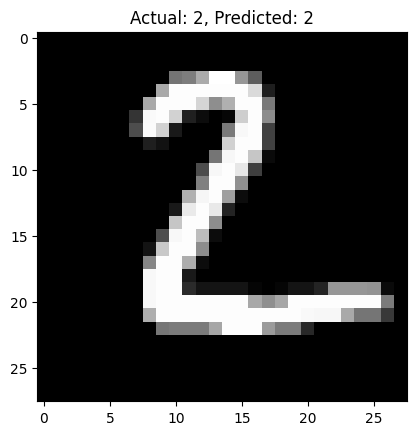

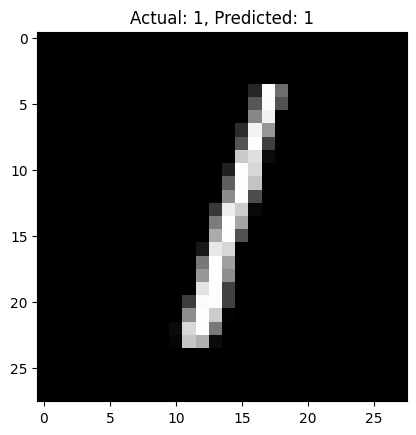

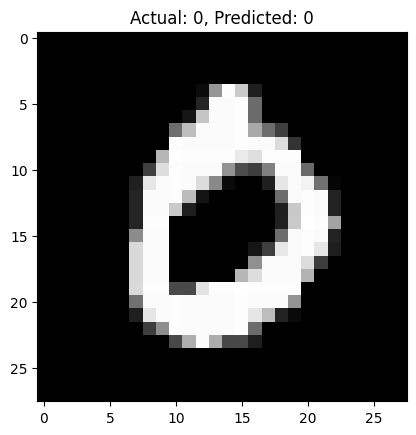

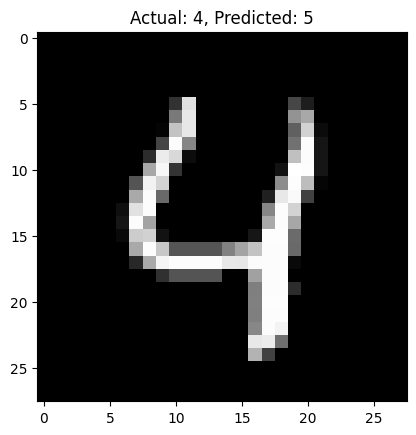

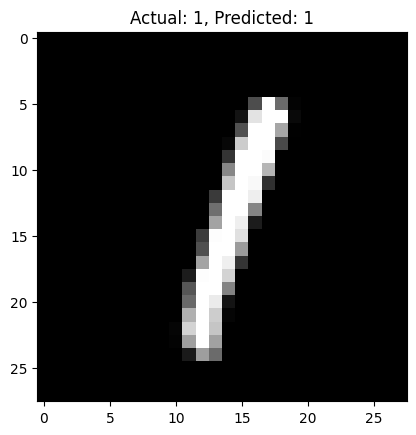

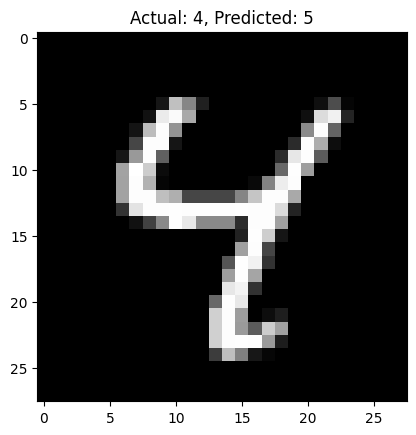

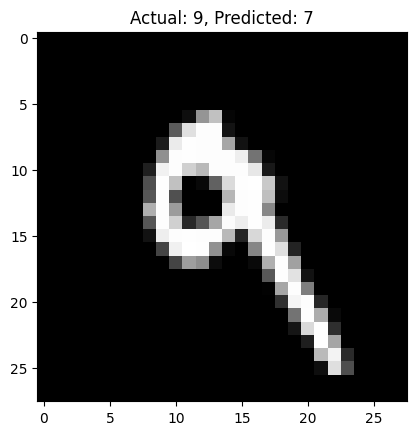

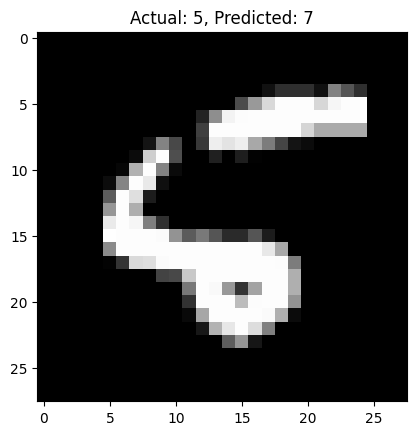

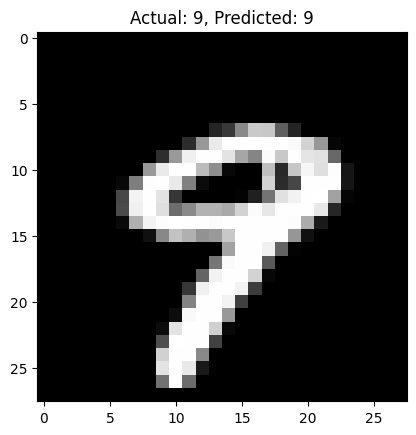

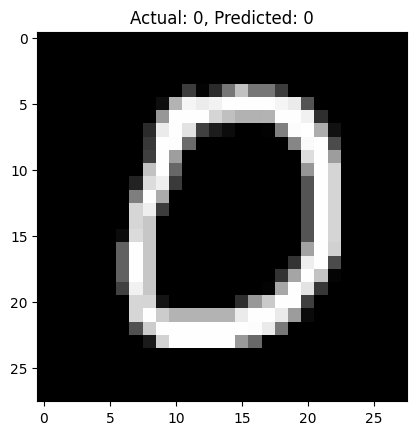

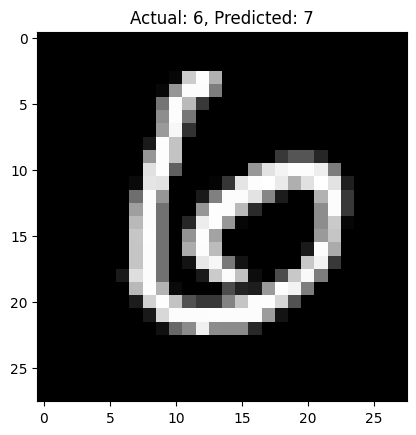

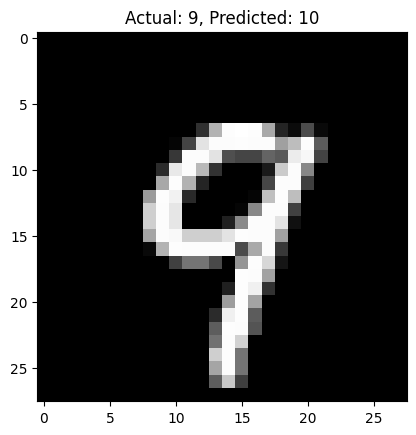

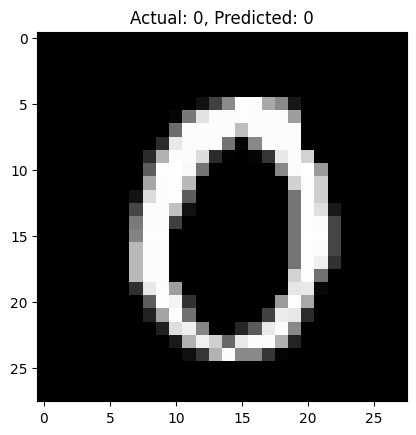

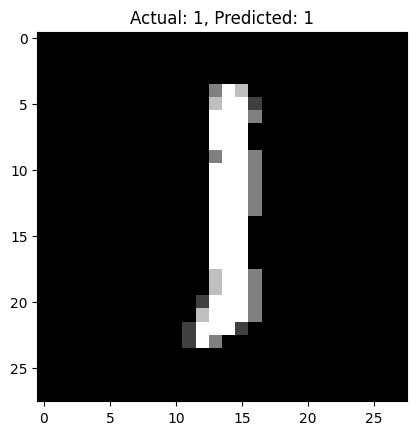

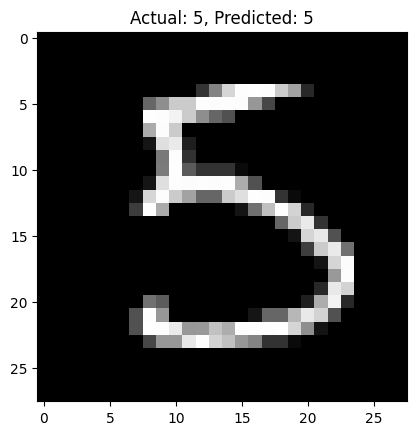

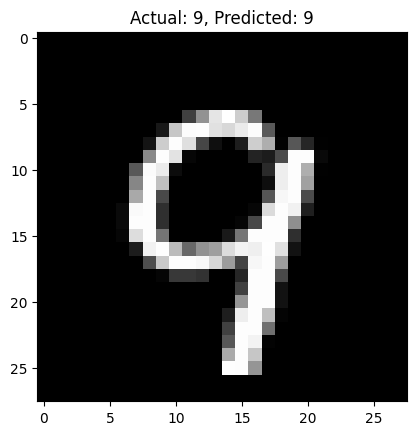

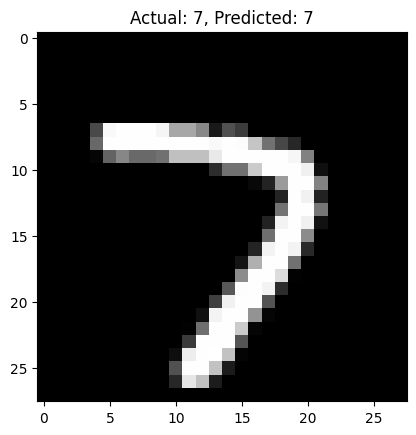

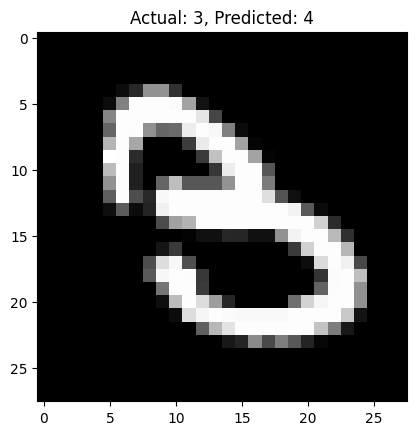

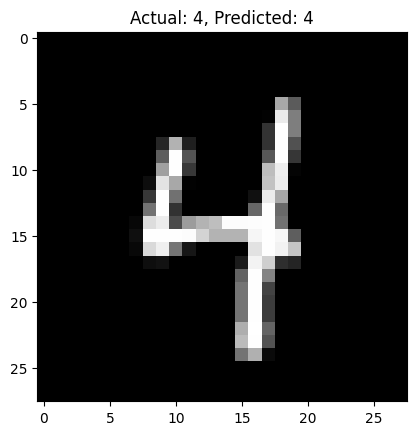

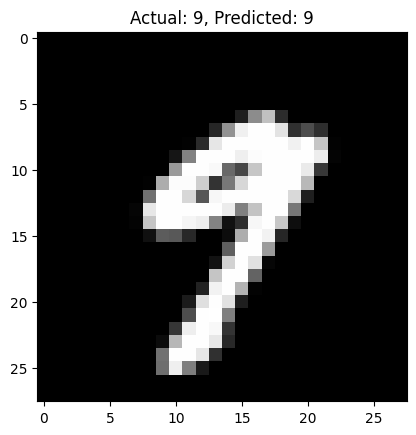

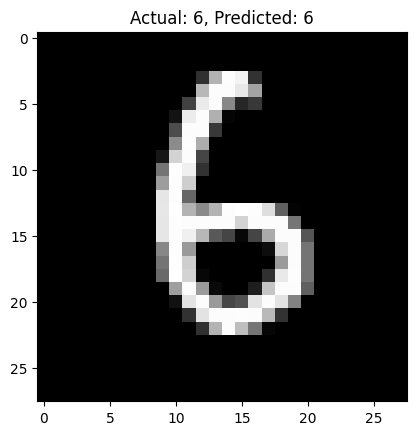

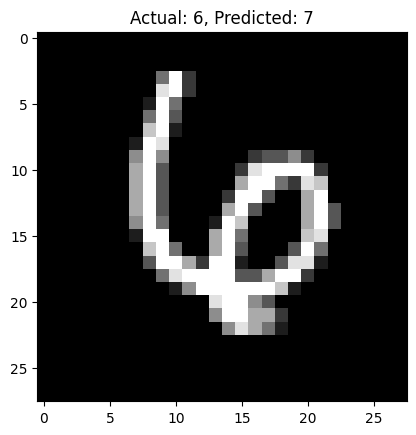

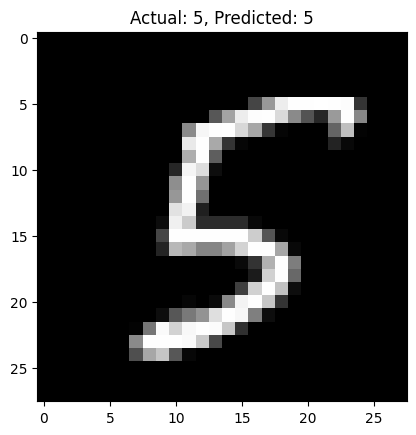

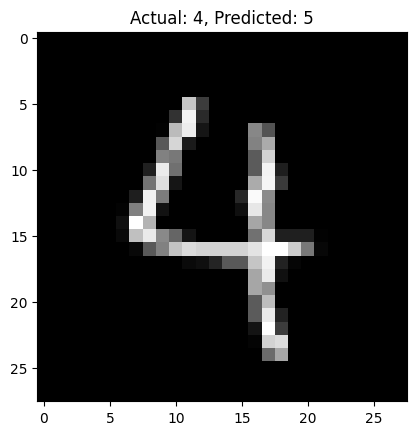

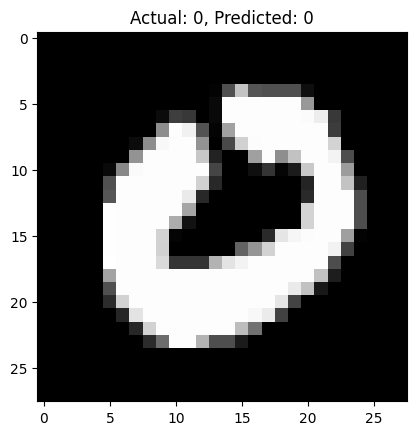

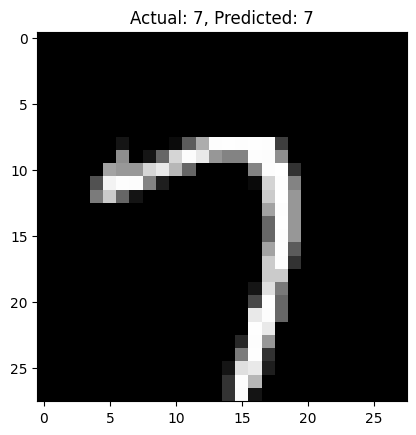

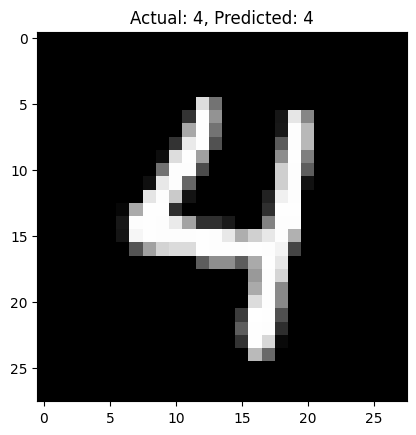

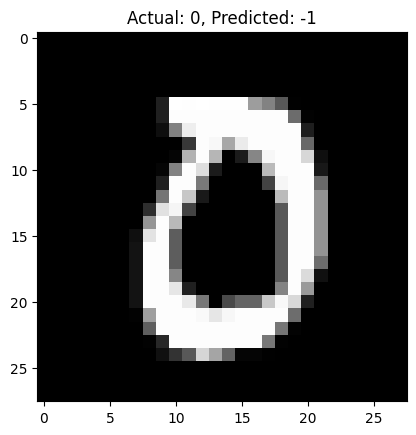

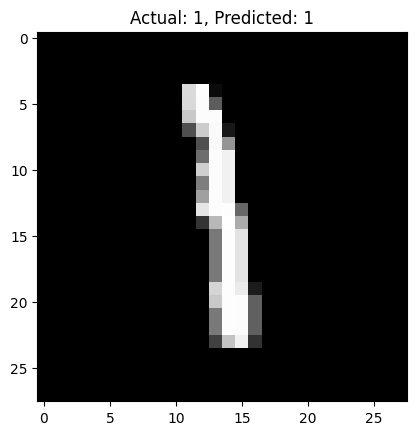

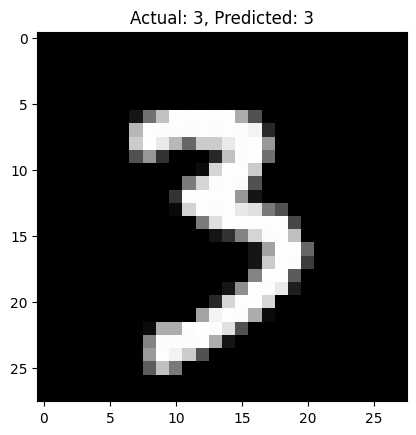

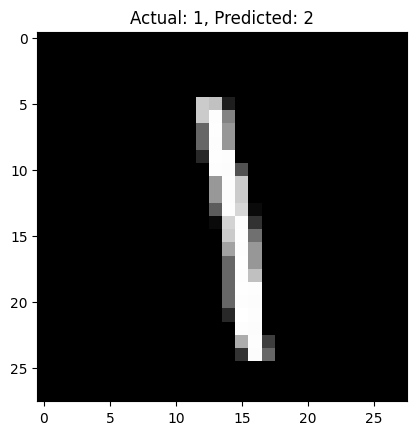

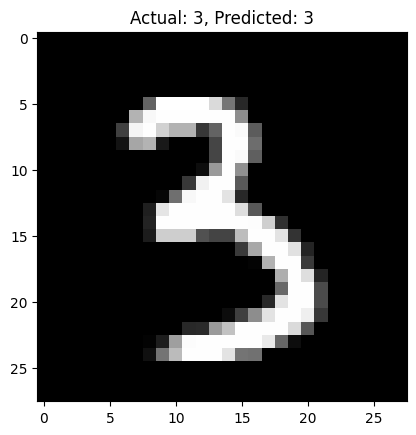

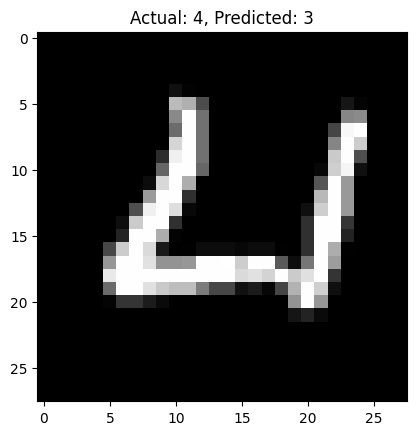

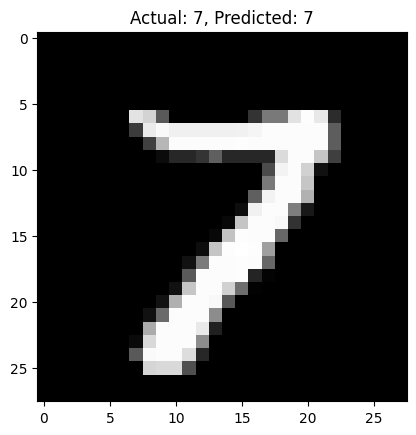

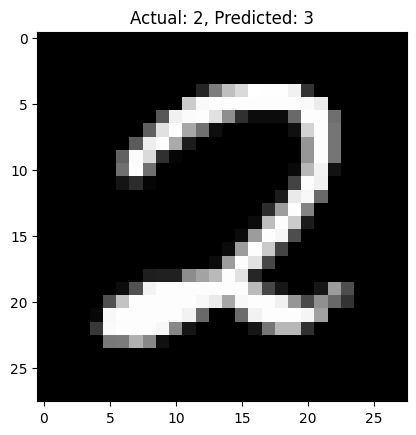

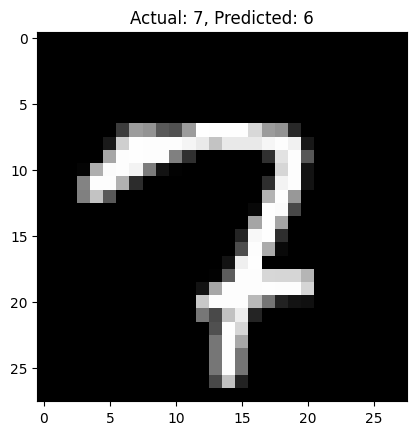

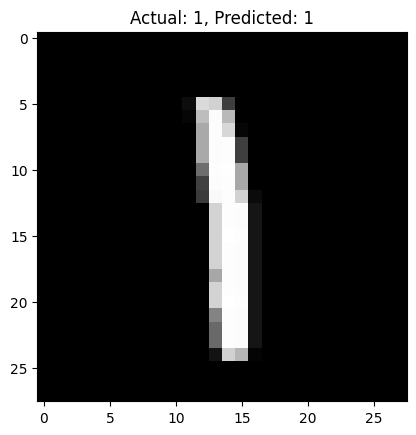

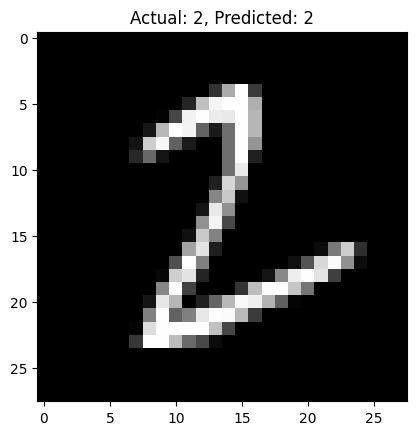

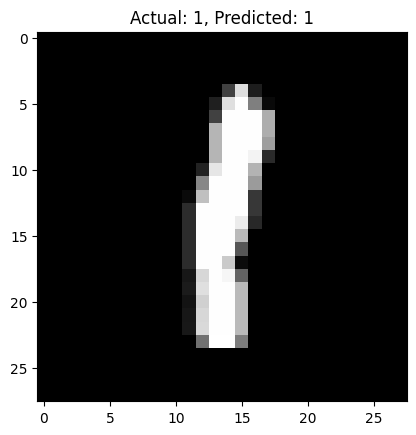

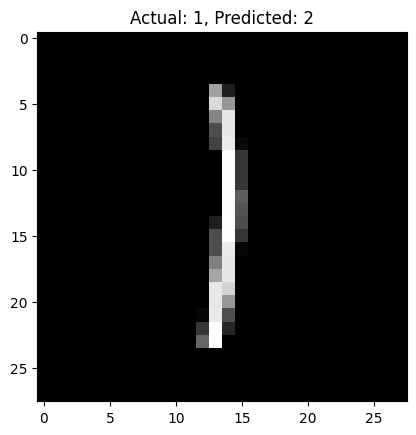

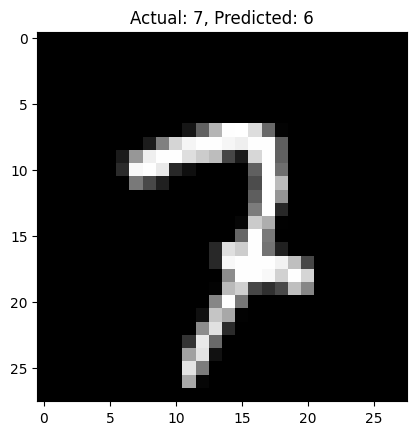

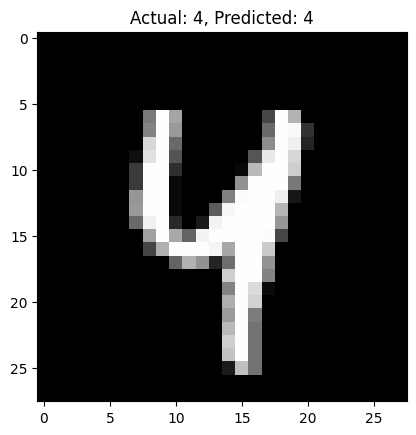

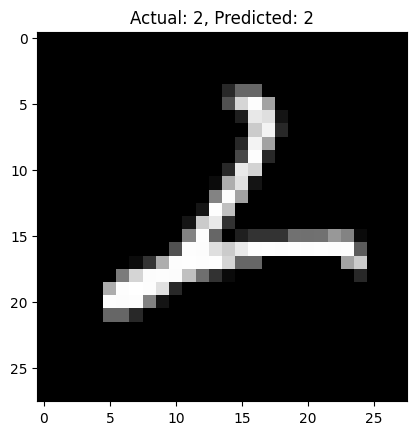

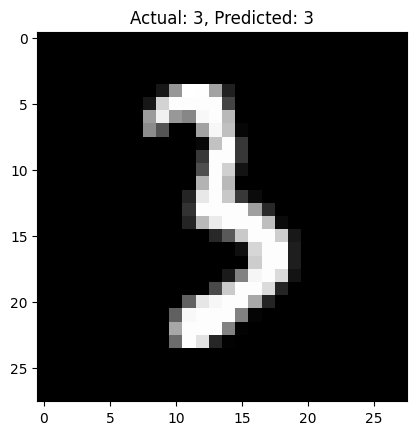

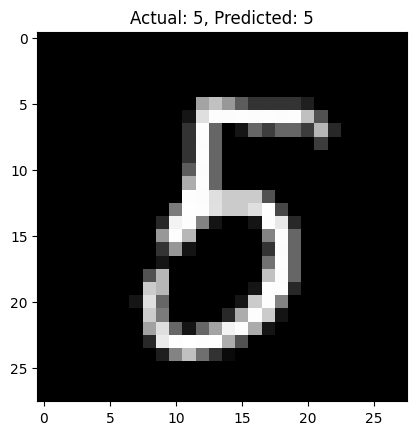

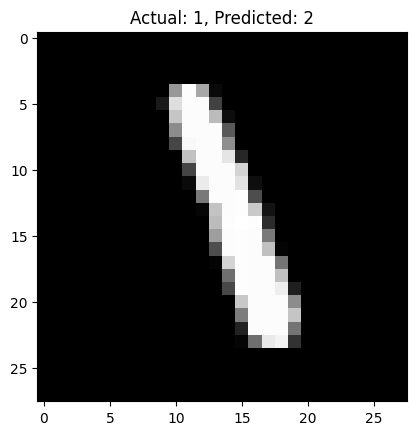

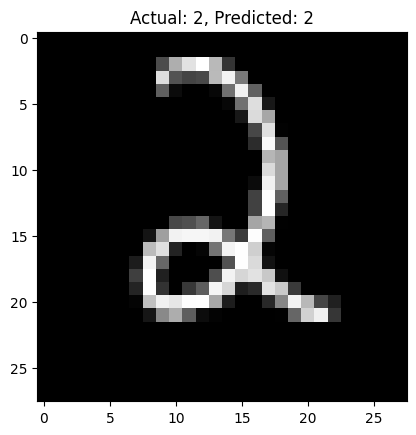

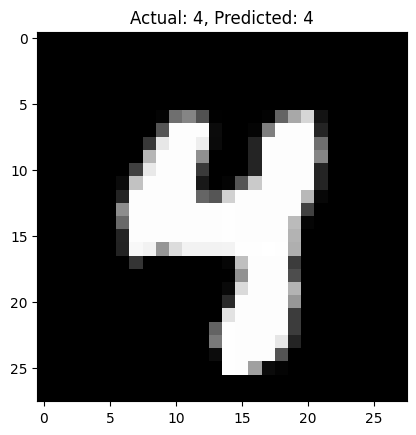

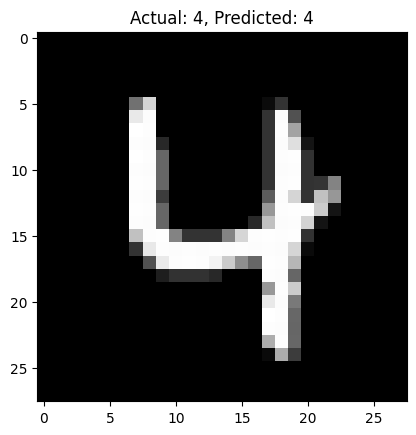

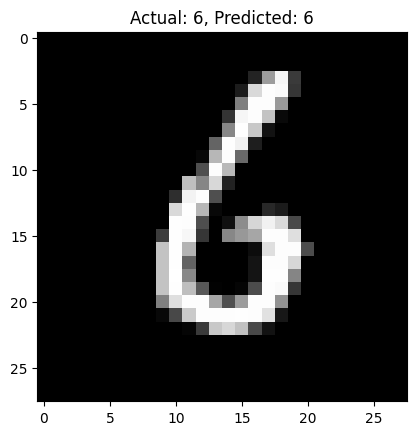

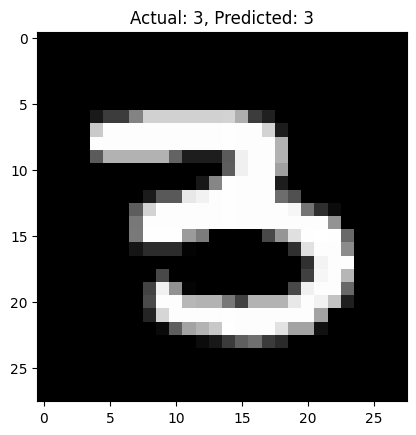

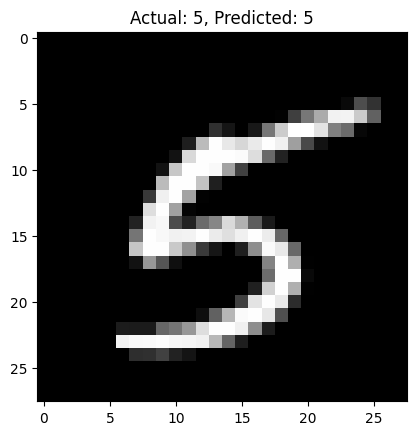

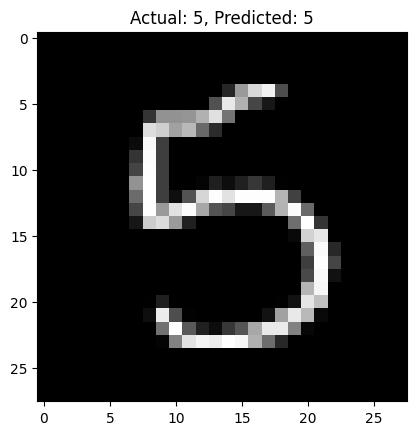

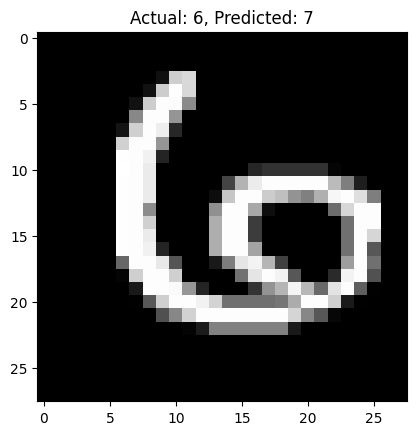

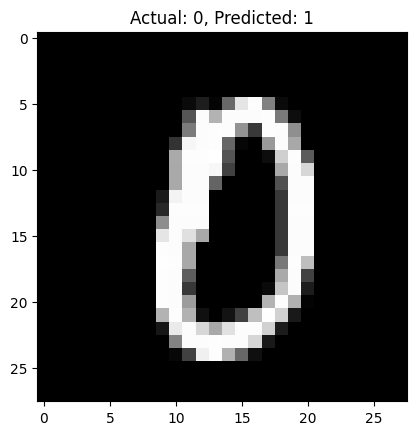

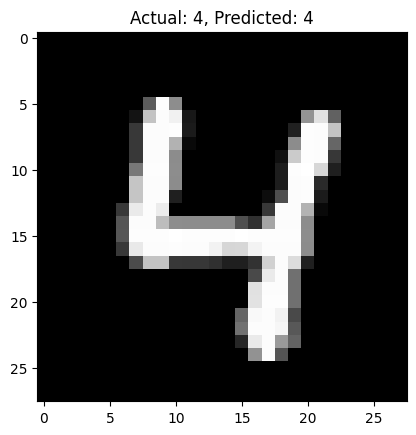

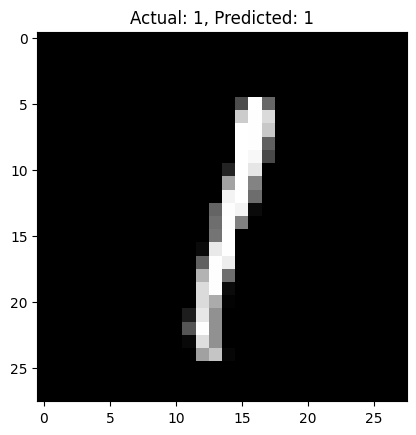

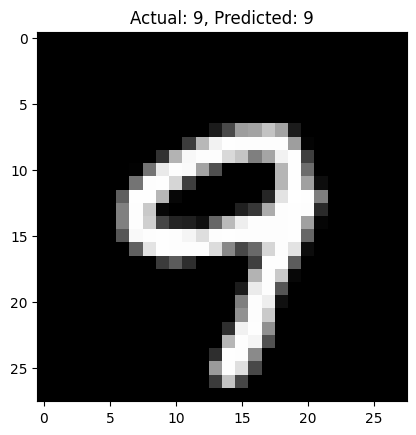

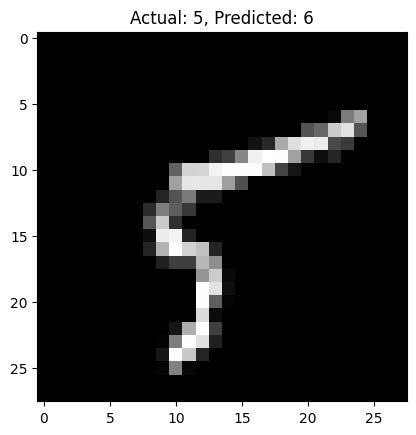

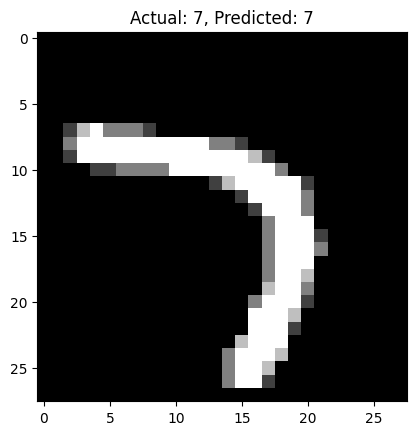

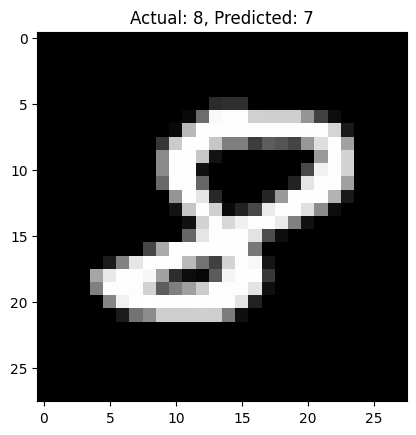

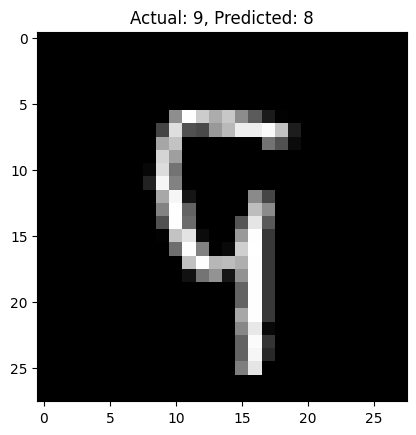

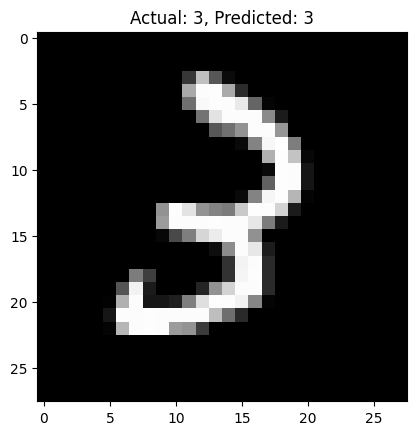

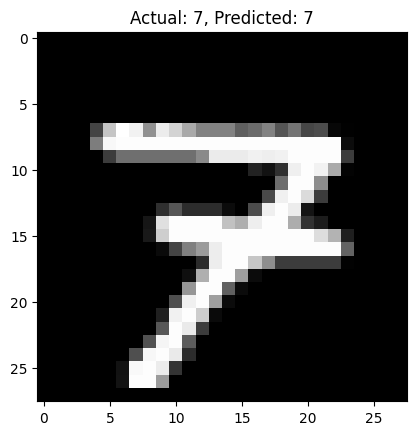

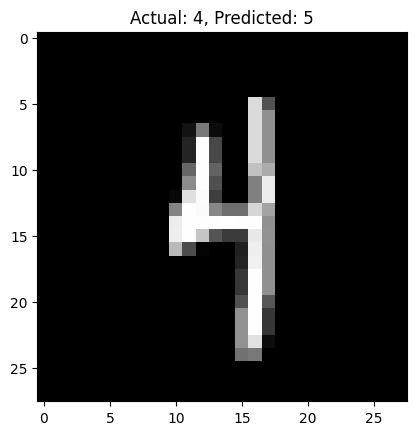

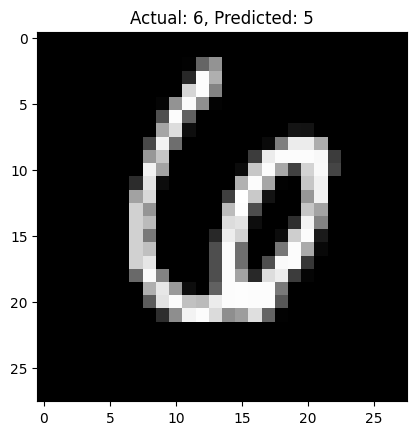

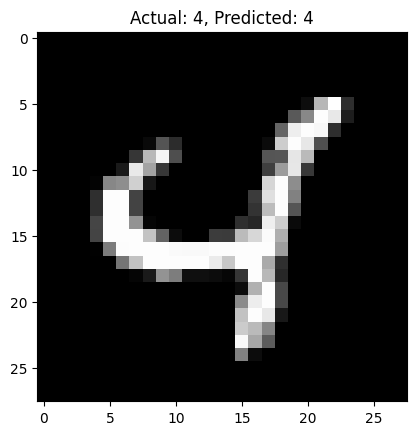

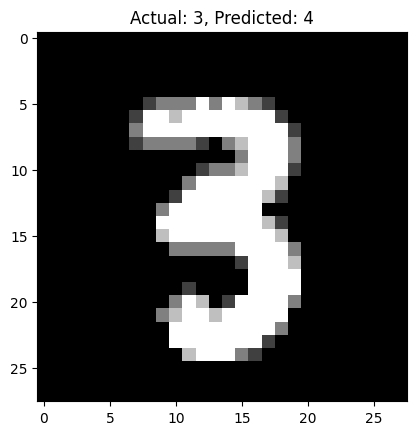

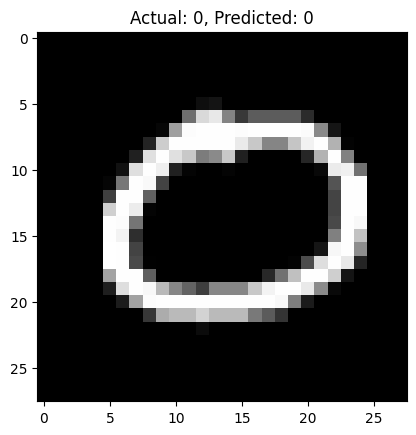

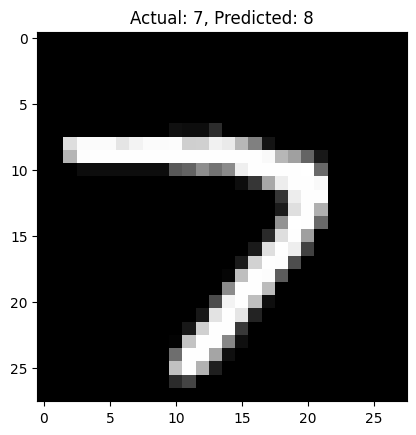

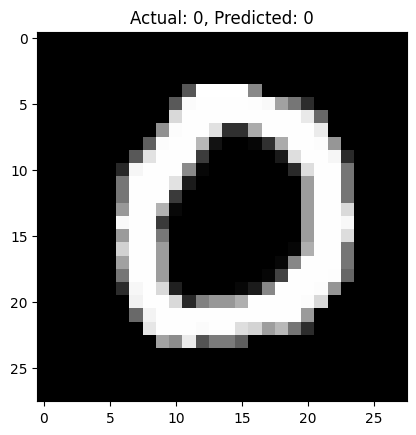

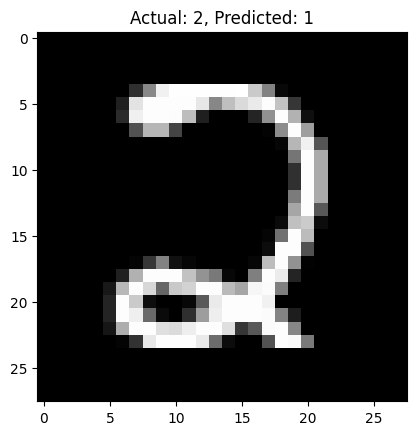

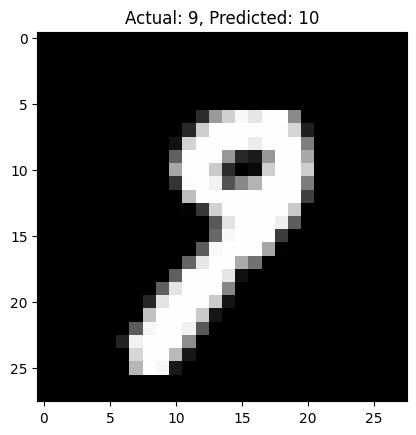

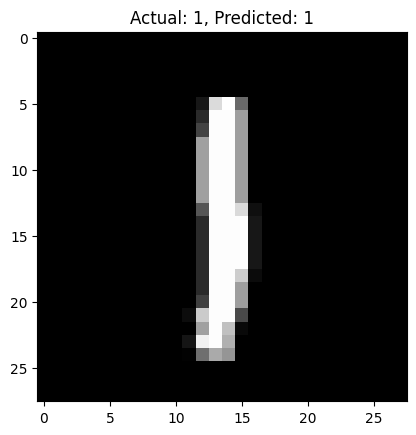

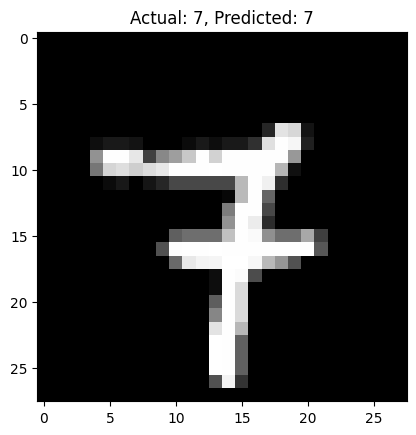

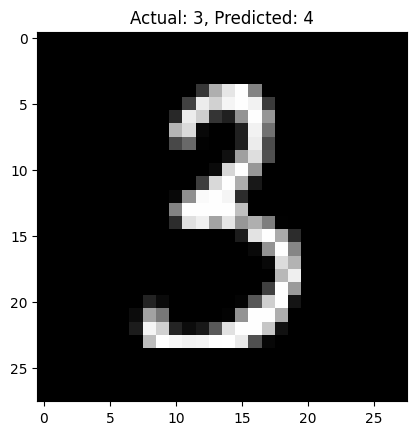

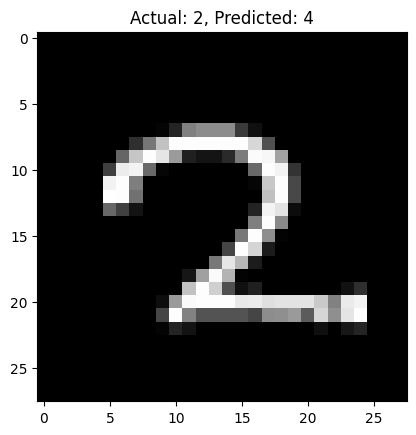

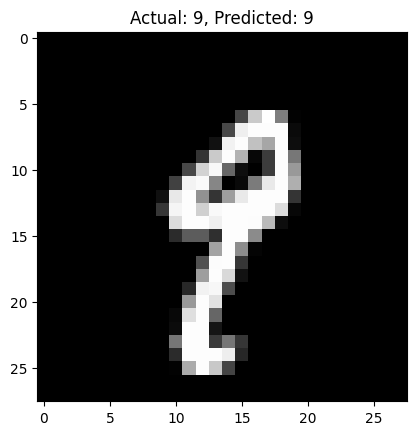

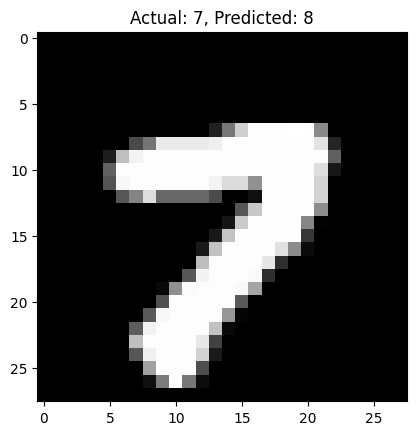

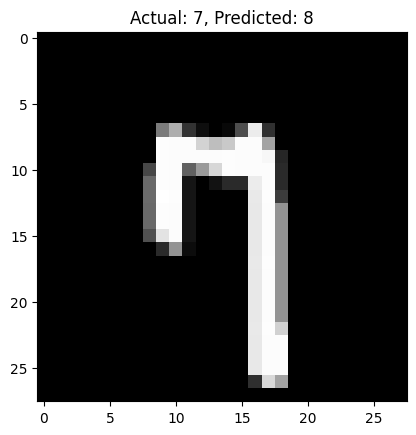

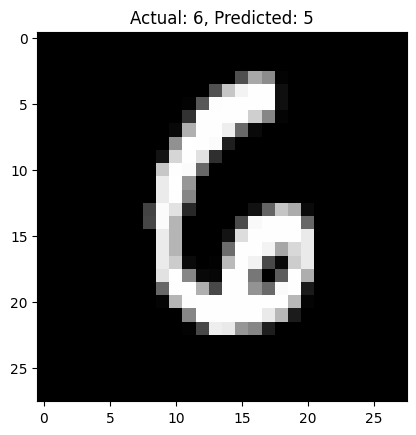

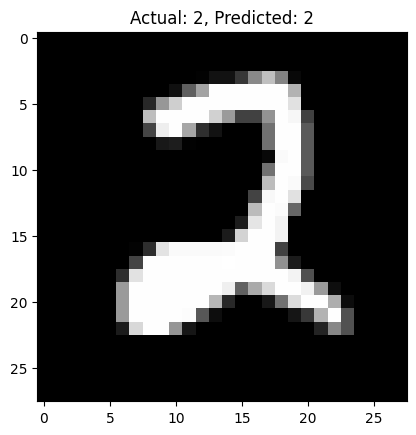

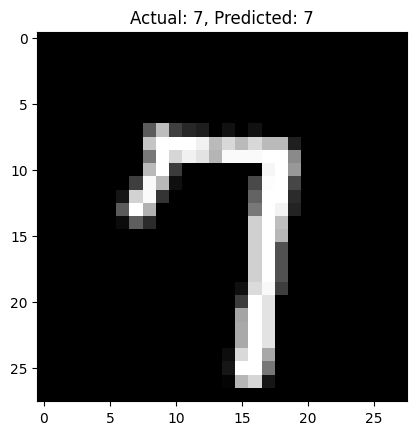

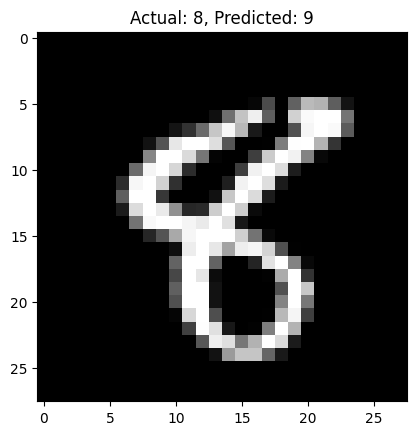

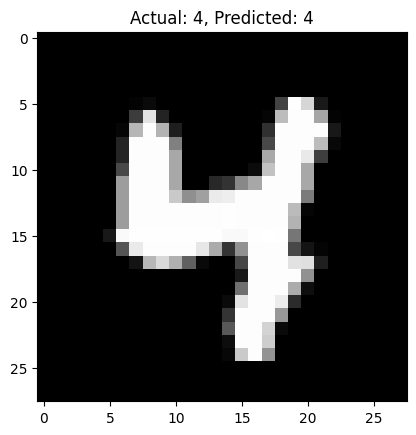

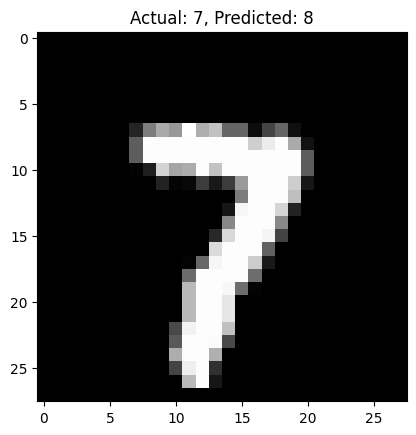

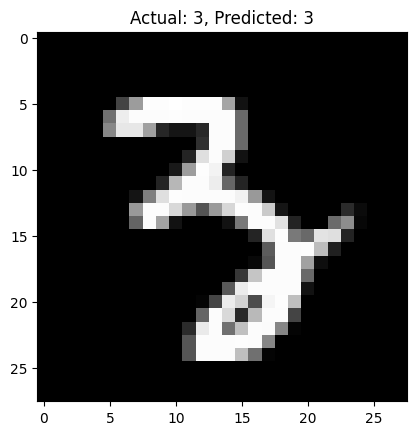

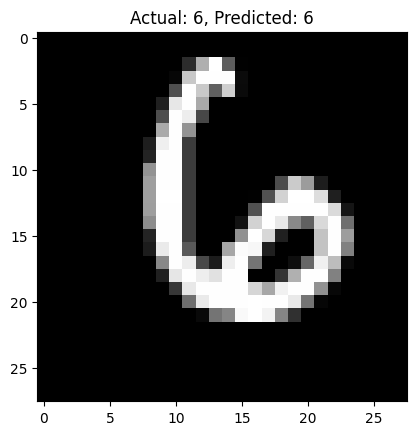

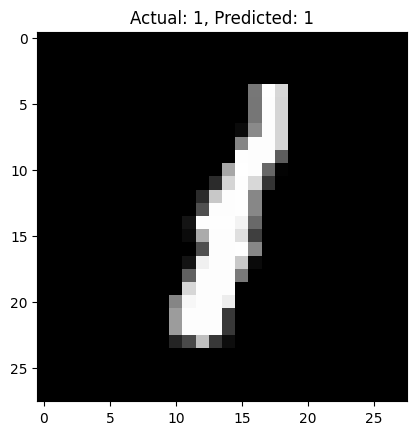

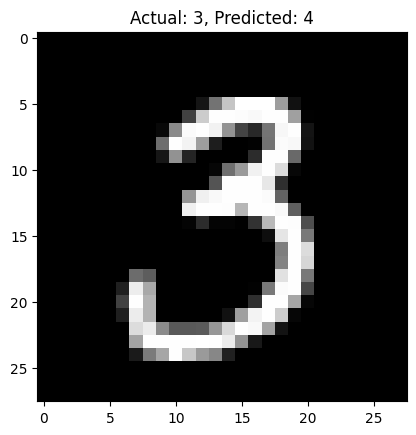

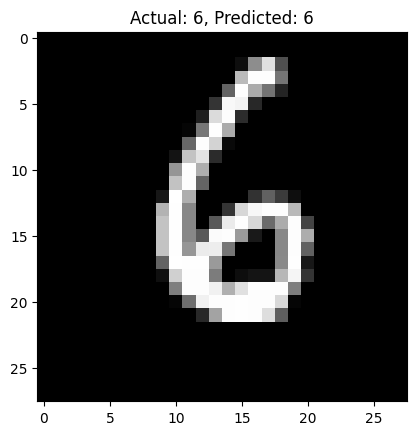

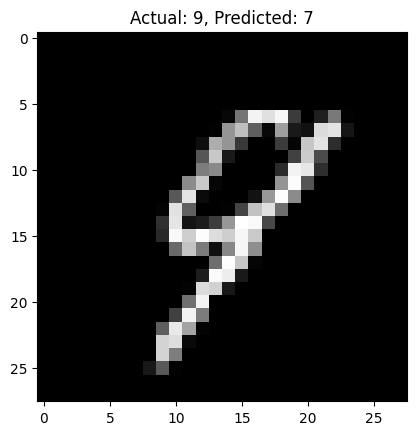

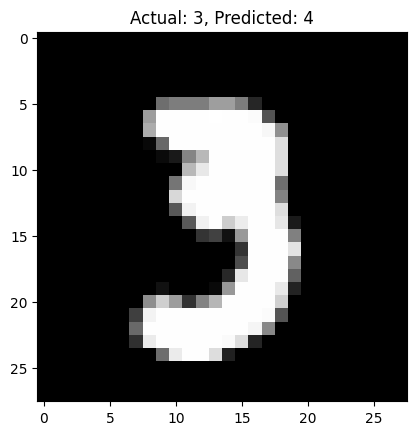

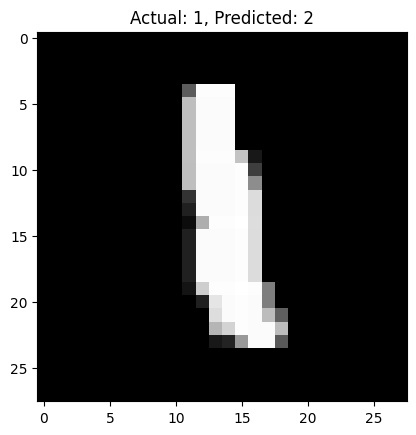

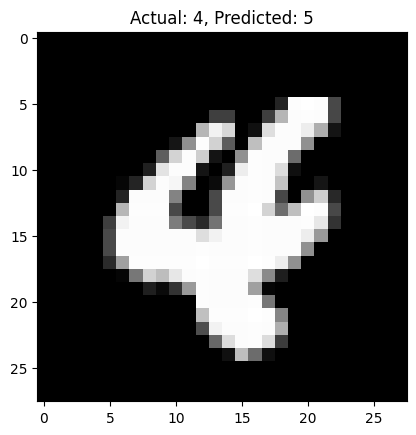

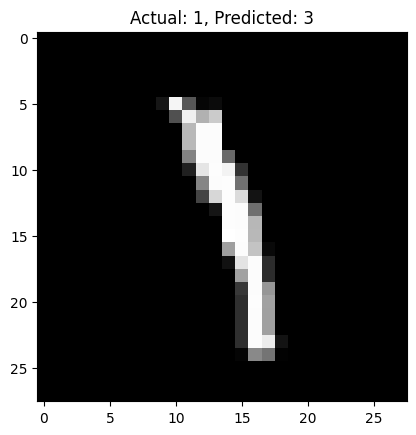

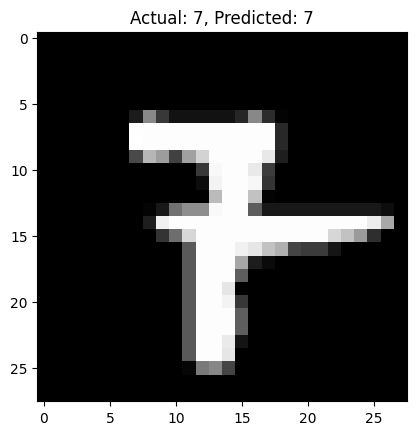

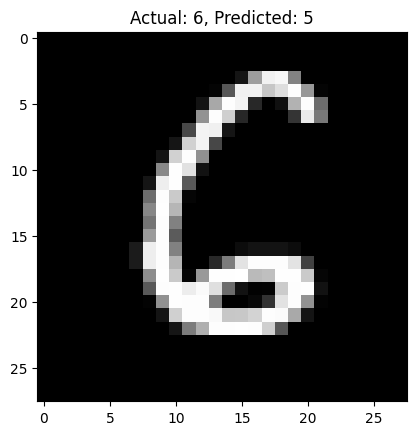

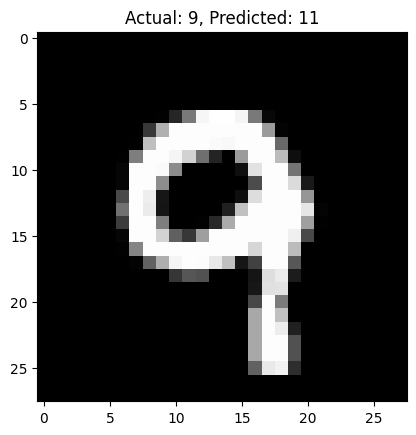

In [12]:

Mnist.show_predictions(X_test, y_test, num_examples=100)

여기서 부터는 제가 개인적으로 궁금해서 예시 그림이랑 모델이 예측한 값이 맞는 지 확인하는 코드입니다.
사진을 출력하기 위해 matplotlib을 import했습니다.

In [ ]:
import matplotlib.pyplot as plt  # 추가: 시각화를 위해 matplotlib를 임포트합니다.
def show_example_prediction(index):
    # 입력 이미지
    example_image = X_test[index].reshape(28, 28)  # 28x28 이미지로 변환

    # 모델 예측
    z1 = np.dot(X_test[index].reshape(1, -1), Mnist.w1) + Mnist.b1
    a1 = Mnist.relu(z1)
    z2 = np.dot(a1, Mnist.w2) + Mnist.b2
    a2 = Mnist.relu(z2)
    z3 = np.dot(a2, Mnist.w3) + Mnist.b3
    a3 = z3
    
    predicted_label = np.argmax(a3)

    # 실제 레이블
    actual_label = np.argmax(y_test[index])
    # 이미지와 예측 결과를 출력
    plt.imshow(example_image, cmap='gray')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [ ]:
# 예시 이미지 보기 (예: 첫 번째 테스트 이미지)
for idx in range(100):
    show_example_prediction(idx)